In [80]:
#Import libraries 
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [81]:
#Define the path for dataset folders: Training, Validation and Test  
train_path = r"/Users/vpriyanca/Downloads/ML Project_1_2/images_IC/images/train"
valid_path = r"/Users/vpriyanca/Downloads/ML Project_1_2/images_IC/images/validation"
test_path = r"/Users/vpriyanca/Downloads/ML Project_1_2/images_IC/images/test"

In [82]:
#Creating data generators for training, validation and test sets 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [83]:
train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_path, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 12466 images belonging to 3 classes.
Found 1874 images belonging to 3 classes.
Found 4105 images belonging to 3 classes.


In [68]:
# Create CNN model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 26, 26, 128)    

In [84]:
#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
#Model training on train and validation set 
history = model.fit(train_generator, epochs=5, validation_data=valid_generator)

Epoch 1/5
390/390 [==============================] - 1194s 3s/step - loss: 1.1011 - accuracy: 0.3347 - val_loss: 1.0980 - val_accuracy: 0.3837
Epoch 2/5
390/390 [==============================] - 4490s 12s/step - loss: 0.8525 - accuracy: 0.5685 - val_loss: 3.1821 - val_accuracy: 0.3202
Epoch 3/5
390/390 [==============================] - 4562s 12s/step - loss: 0.3767 - accuracy: 0.8462 - val_loss: 5.0180 - val_accuracy: 0.3260
Epoch 4/5
390/390 [==============================] - 204s 523ms/step - loss: 0.2646 - accuracy: 0.8951 - val_loss: 5.3443 - val_accuracy: 0.2828
Epoch 5/5
390/390 [==============================] - 209s 535ms/step - loss: 0.1916 - accuracy: 0.9232 - val_loss: 7.3195 - val_accuracy: 0.2247


In [73]:
#Model Evaluation on test set 
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

129/129 [==============================] - 18s 141ms/step - loss: 1.0977 - accuracy: 0.3113
Test Loss: 1.097702145576477
Test Accuracy: 0.31132763624191284


In [53]:
#Generate prediction for test set 
predictions = model.predict(test_generator)

129/129 [==============================] - 18s 140ms/step


In [74]:
#Compute confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_generator.classes, y_pred=np.argmax(predictions, axis=-1))
print(cm)

[[495 315 472]
 [456 318 513]
 [566 378 592]]


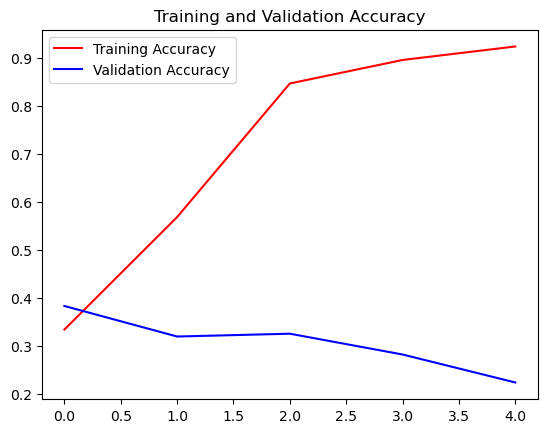

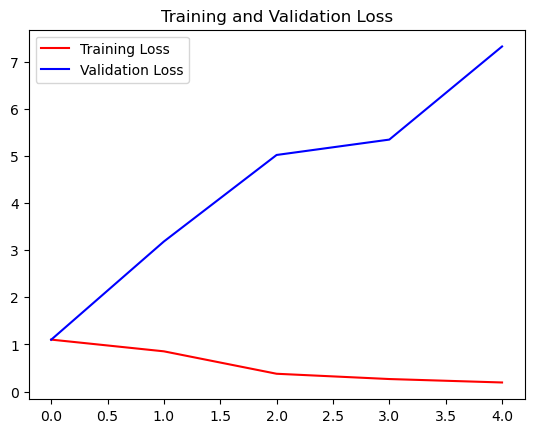

In [75]:
#Plot training and validation accuracy and loss curves 
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [86]:
#Model training on train and validation set 
history = model.fit(train_generator, epochs=50,batch_size = 32,validation_data=valid_generator)

Epoch 1/50
390/390 [==============================] - 201s 514ms/step - loss: 0.9244 - accuracy: 0.5198 - val_loss: 1.7121 - val_accuracy: 0.1371
Epoch 2/50
390/390 [==============================] - 201s 514ms/step - loss: 0.3628 - accuracy: 0.8562 - val_loss: 3.6077 - val_accuracy: 0.3010
Epoch 3/50
390/390 [==============================] - 201s 516ms/step - loss: 0.2086 - accuracy: 0.9201 - val_loss: 3.6417 - val_accuracy: 0.2935
Epoch 4/50
390/390 [==============================] - 201s 514ms/step - loss: 0.1567 - accuracy: 0.9419 - val_loss: 3.9500 - val_accuracy: 0.2332
Epoch 5/50
390/390 [==============================] - 200s 513ms/step - loss: 0.1154 - accuracy: 0.9597 - val_loss: 4.7329 - val_accuracy: 0.2919
Epoch 6/50
390/390 [==============================] - 200s 512ms/step - loss: 0.0939 - accuracy: 0.9639 - val_loss: 4.4403 - val_accuracy: 0.3047
Epoch 7/50
390/390 [==============================] - 202s 517ms/step - loss: 0.0880 - accuracy: 0.9676 - val_loss: 5.9427 -

KeyboardInterrupt: 